In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine_12.csv
/kaggle/input/machine_1.csv
/kaggle/input/machine_19.csv
/kaggle/input/machine_17.csv
/kaggle/input/machine_4.csv
/kaggle/input/machine_11.csv
/kaggle/input/machine_6.csv
/kaggle/input/machine_18.csv
/kaggle/input/machine_15.csv
/kaggle/input/machine_16.csv
/kaggle/input/machine_9.csv
/kaggle/input/machine_8.csv
/kaggle/input/machine_0.csv
/kaggle/input/machine_13.csv
/kaggle/input/machine_14.csv
/kaggle/input/machine_2.csv
/kaggle/input/machine_5.csv
/kaggle/input/machine_10.csv
/kaggle/input/machine_7.csv
/kaggle/input/machine_3.csv


## Data Acquisition/Loading

First I will load the data of all the machines in a single dataframe by concatenating individual dataframes corresponding to each csv for each of the machines. I have concatenated the data both, column wise and row wise and stored the result in 2 different dataframes, so that any one can be used whenever required.

In [15]:
from glob import glob
import pandas as pdlib

def produceCombinedCSV(list_of_files):
   
   # Consolidate all CSV files into one object
   result_df = pdlib.concat([pdlib.read_csv(file).add_prefix(str(list_of_files.index(file)) + '_') for file in list_of_files], axis=1).T.drop_duplicates().T
   return result_df

# Move to the path that holds our CSV files
csv_file_path = '/kaggle/input/'

# List all CSV files in the working dir
file_pattern = "csv"
#list_of_files = [file for file in glob('*.{}'.format(file_pattern))]
list_of_files = glob(csv_file_path + "*.csv")
print(list_of_files)

df_consolidated_columnwise = produceCombinedCSV(list_of_files)

['/kaggle/input/machine_12.csv', '/kaggle/input/machine_1.csv', '/kaggle/input/machine_19.csv', '/kaggle/input/machine_17.csv', '/kaggle/input/machine_4.csv', '/kaggle/input/machine_11.csv', '/kaggle/input/machine_6.csv', '/kaggle/input/machine_18.csv', '/kaggle/input/machine_15.csv', '/kaggle/input/machine_16.csv', '/kaggle/input/machine_9.csv', '/kaggle/input/machine_8.csv', '/kaggle/input/machine_0.csv', '/kaggle/input/machine_13.csv', '/kaggle/input/machine_14.csv', '/kaggle/input/machine_2.csv', '/kaggle/input/machine_5.csv', '/kaggle/input/machine_10.csv', '/kaggle/input/machine_7.csv', '/kaggle/input/machine_3.csv']


In [16]:
df_consolidated_columnwise.rename(columns={'0_Unnamed: 0': 'DateTime'}, inplace=True)
df_consolidated_columnwise.set_index('DateTime', inplace=True)
df_consolidated_columnwise.head()

,0_0,0_1,0_2,0_3,1_0,1_1,1_2,1_3,2_0,2_1,...,17_2,17_3,18_0,18_1,18_2,18_3,19_0,19_1,19_2,19_3
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00.000000000,12.6048,8.83999,-11.7837,10.0641,12.5882,8.82972,-11.8035,10.0831,26.2358,8.14373,...,-11.8,10.0717,12.6014,8.8287,-11.779,10.0745,12.6023,8.8357,-11.7906,10.0831
2019-01-01 08:00:09.603201067,10.8348,2.79326,11.5722,21.8895,10.8222,2.79525,11.5603,21.8987,27.4796,8.68749,...,11.5798,21.8874,10.8267,2.77465,11.5552,21.8906,10.8244,2.80424,11.5731,21.8953
2019-01-01 16:00:19.206402134,21.0764,-0.665343,-17.8235,-1.35548,21.0747,-0.655051,-17.8406,-1.34675,46.3986,-2.39572,...,-17.8444,-1.35208,21.0754,-0.665288,-17.8337,-1.3571,21.0715,-0.64904,-17.8292,-1.34101
2019-01-02 00:00:28.809603201,32.2861,6.53382,-13.5007,-4.25664,32.2844,6.54465,-13.4989,-4.2817,9.10713,-13.086,...,-13.4927,-4.25672,32.2909,6.53009,-13.4922,-4.25801,32.3021,6.53834,-13.4922,-4.2463
2019-01-02 08:00:38.412804268,28.0623,3.69034,21.9814,13.6409,28.0739,253.682,271.984,263.627,-39.8131,-7.17063,...,21.9897,13.6402,28.0695,3.70064,21.9838,13.6318,28.0609,3.6857,21.9966,13.631


In [17]:
from glob import glob
import pandas as pdlib
from os import chdir
def produceCombinedCSV(list_of_files):
   
   # Consolidate all CSV files into one object
   result_df = pdlib.concat([pdlib.read_csv(file) for file in list_of_files], keys=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])
   # Convert the above object into a csv file and export
   result_df.to_csv('/kaggle/working/ConsolidateOutput_rowwise.csv')

# Move to the path that holds our CSV files
csv_file_path = '/kaggle/input/'
chdir(csv_file_path)

# List all CSV files in the working dir
file_pattern = "csv"
list_of_files = [file for file in glob('*.{}'.format(file_pattern))]
print(list_of_files)

produceCombinedCSV(list_of_files)

['machine_12.csv', 'machine_1.csv', 'machine_19.csv', 'machine_17.csv', 'machine_4.csv', 'machine_11.csv', 'machine_6.csv', 'machine_18.csv', 'machine_15.csv', 'machine_16.csv', 'machine_9.csv', 'machine_8.csv', 'machine_0.csv', 'machine_13.csv', 'machine_14.csv', 'machine_2.csv', 'machine_5.csv', 'machine_10.csv', 'machine_7.csv', 'machine_3.csv']


In [18]:
import pandas as pd
df_consolidated_rowwise = pd.read_csv("/kaggle/working/ConsolidateOutput_rowwise.csv", index_col=[0]).drop('Unnamed: 1', axis=1)
df_consolidated_rowwise.rename(columns={'Unnamed: 0.1': 'DateTime'}, inplace=True)
df_consolidated_rowwise.head()

,DateTime,0,1,2,3
0,2019-01-01 00:00:00.000000000,12.604780,8.839988,-11.783721,10.064102
0,2019-01-01 08:00:09.603201067,10.834779,2.793263,11.572223,21.889535
0,2019-01-01 16:00:19.206402134,21.076370,-0.665343,-17.823464,-1.355479
0,2019-01-02 00:00:28.809603201,32.286100,6.533825,-13.500730,-4.256643
0,2019-01-02 08:00:38.412804268,28.062272,3.690336,21.981440,13.640932


We'll now plot the features of one machine's reading, to check the waveforms of the 4 signals.

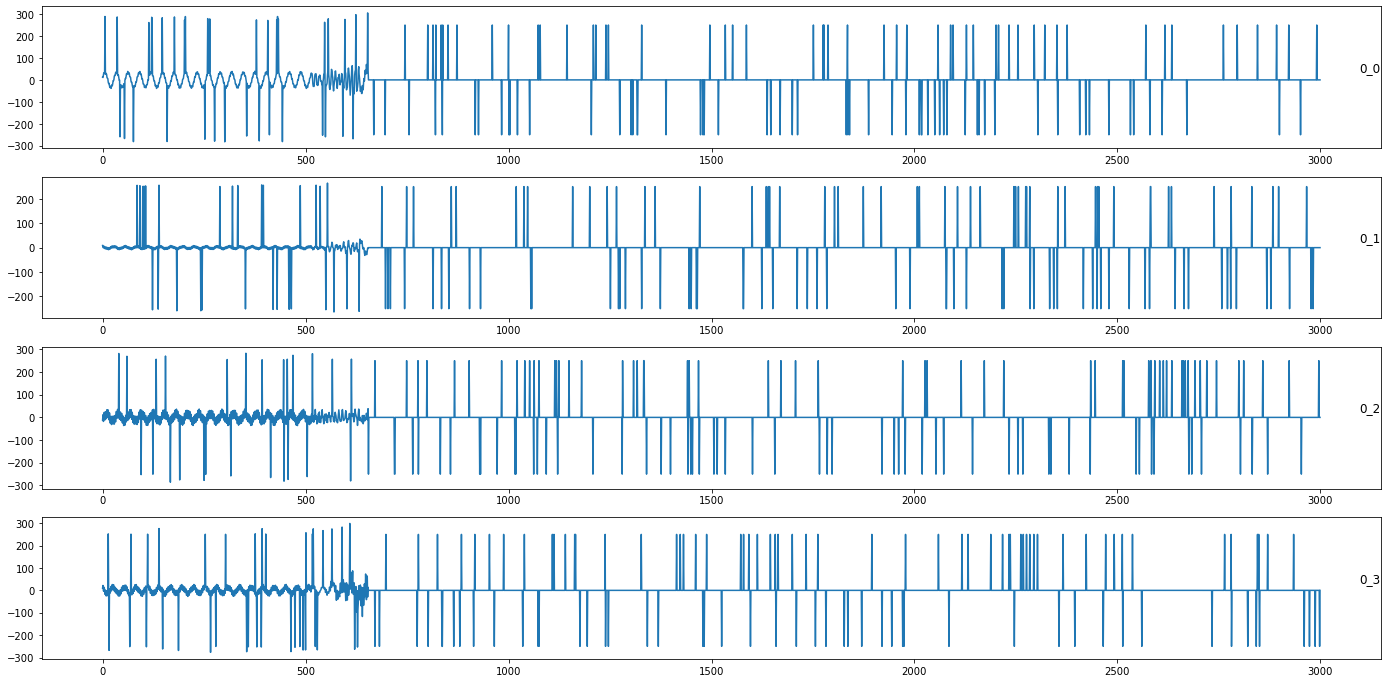

In [19]:
from matplotlib import pyplot
# load dataset
values = df_consolidated_columnwise.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure(figsize=(24,12))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df_consolidated_columnwise.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

From the above plot, we can see that the values in all fields, follow a certain pattern upto a certain point in time, after which a sudden disruption in the pattern is observed, post which, the signal goes 0.

Also, the entire signal reading is loaded with a lot of noisy measurements as indicated by the high-value, vertical readings. We'll remove those to better view the waveforms.

### Noise Removal

In [20]:
sample = df_consolidated_rowwise.loc[0].copy()

In [21]:
sample_df = sample[(sample['0'] < 100) & (sample['0'] > -100) & (sample['1'] < 100) & (sample['1'] > -100) & (sample['2'] < 100) & (sample['2'] > -100) & (sample['3'] < 100) & (sample['3'] > -100)].copy()
sample_df.head()

,DateTime,0,1,2,3
0,2019-01-01 00:00:00.000000000,12.604780,8.839988,-11.783721,10.064102
0,2019-01-01 08:00:09.603201067,10.834779,2.793263,11.572223,21.889535
0,2019-01-01 16:00:19.206402134,21.076370,-0.665343,-17.823464,-1.355479
0,2019-01-02 00:00:28.809603201,32.286100,6.533825,-13.500730,-4.256643
0,2019-01-02 08:00:38.412804268,28.062272,3.690336,21.981440,13.640932


### Plot for clean values

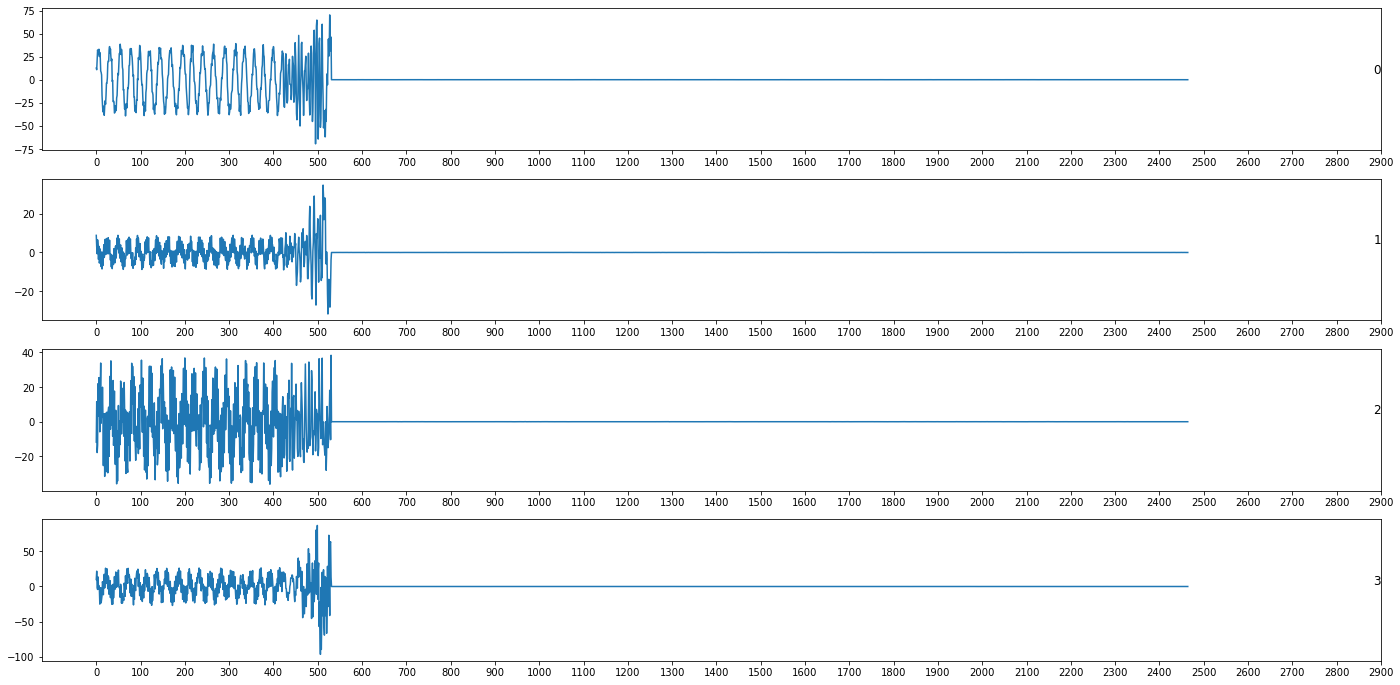

In [22]:
from matplotlib import pyplot
# load dataset
values = sample_df.values
# specify columns to plot
groups = [1,2,3,4]
i = 1
# plot each column
pyplot.figure(figsize=(24,12))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.xticks(np.arange(0, 3000, 100)) 
    pyplot.title(sample_df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

Since the signal contains both negative and positive values, we'll square the signal values and use the squared value for our analysis.

In [23]:
sample_df['0_sqr'] = np.square(sample_df['0'])
sample_df['1_sqr'] = np.square(sample_df['1'])
sample_df['2_sqr'] = np.square(sample_df['2'])
sample_df['3_sqr'] = np.square(sample_df['3'])

sample_df['DateTime'] = pd.to_datetime(sample_df['DateTime'])
sample_df.set_index('DateTime', inplace=True)
sample_df.head()

,0,1,2,3,0_sqr,1_sqr,2_sqr,3_sqr
DateTime,,,,,,,,
2019-01-01 00:00:00.000000000,12.604780,8.839988,-11.783721,10.064102,158.880486,78.145387,138.856073,101.286148
2019-01-01 08:00:09.603201067,10.834779,2.793263,11.572223,21.889535,117.392435,7.802318,133.916338,479.151754
2019-01-01 16:00:19.206402134,21.076370,-0.665343,-17.823464,-1.355479,444.213386,0.442682,317.675871,1.837324
2019-01-02 00:00:28.809603201,32.286100,6.533825,-13.500730,-4.256643,1042.392267,42.690863,182.269708,18.119009
2019-01-02 08:00:38.412804268,28.062272,3.690336,21.981440,13.640932,787.491110,13.618580,483.183683,186.075039


Now we will try using a couple of methods/algorithms to identify the fault inception date/time. We will try using - 

1. SARIMAX Model
2. Custom Function
3. LSTM

## 1. SARIMAX

Since our data contains a time-dependent signal, it can be modelled using Autoregressive models. In AR models, present value is modeled as a function of past values and noise. We will be using the SARIMAX model here, because as shown by the ACF plot below, our signal is dependent on the past values and also shows some seasonality (a repeating pattern of 12 periods approximately). Also since the signal is non-stationary, we need to use a time-differenced model which explains use of the I (integrated) in SARIMAX.

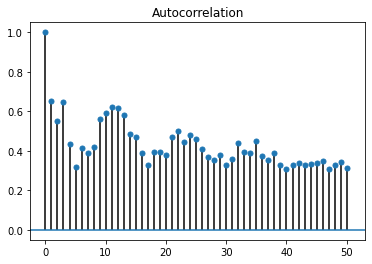

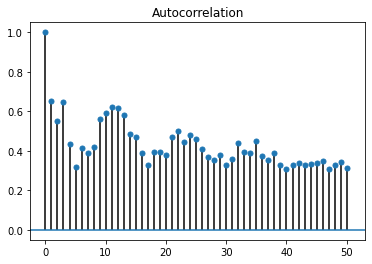

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sample_df['0_sqr'], lags=50, alpha=1)

In [25]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt

train, test = sample_df['0_sqr'].iloc[0:70], sample_df['0_sqr'].iloc[70:1000]
#train_log, test_log = np.log10(train), np.log10(test)
my_order = (0,0,0)
my_seasonal_order = (1, 1, 1, 12)

predicted=13.651915, expected=0.000041


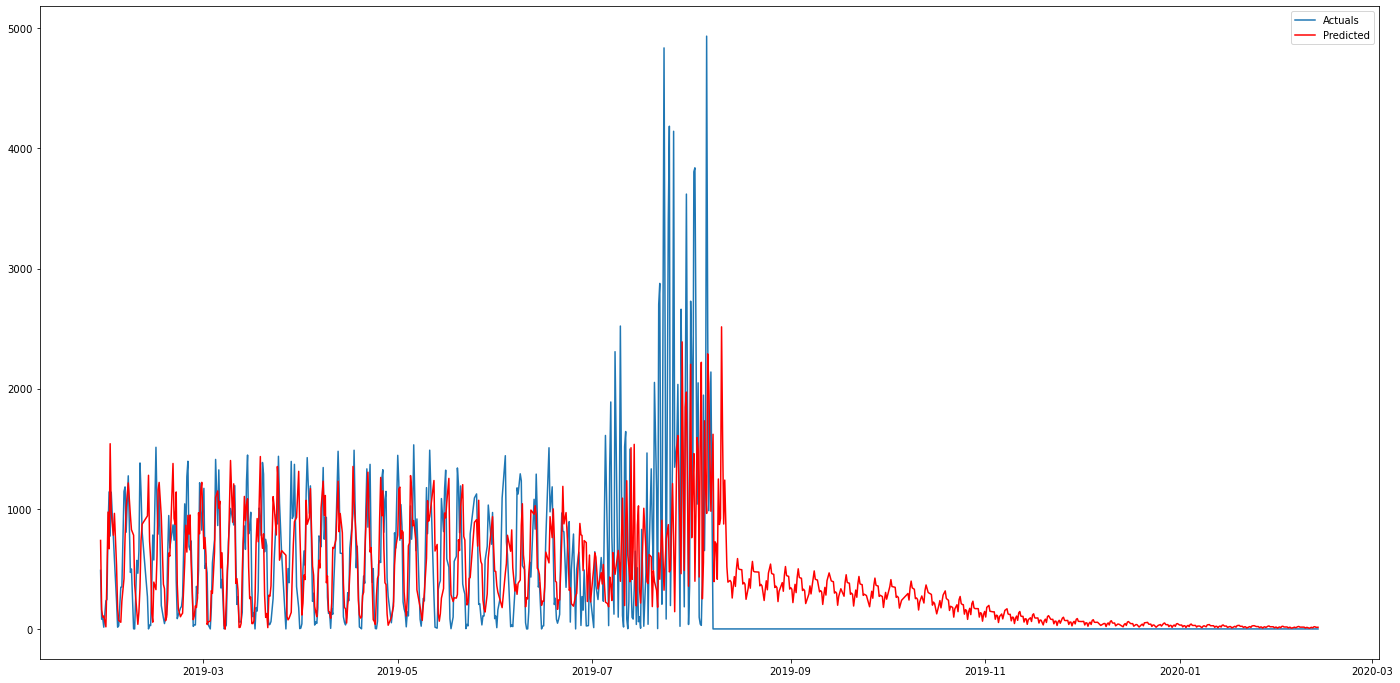

In [26]:
history = [x for x in train]
predictions = list()
predict_log=list()
for t in range(len(test)):
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot
figsize=(24, 12)
plt.figure(figsize=figsize)
pyplot.plot(sample_df['0_sqr'].iloc[70:1000].index, test,label='Actuals')
pyplot.plot(sample_df['0_sqr'].iloc[70:1000].index, predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

So, while SARIMAX works well at predicting signals so that discrepancies in signal values can be identified by subtracting from the predicted signal, it works for single variables/signals only. Using this, we'll have to create a different SARIMAX model for each of the signals of each machine. This can be very expensive process-wise so we will assess other options first.

## Windowed MAX and First order Differences

Here, we will follow a set of steps to specifically identify incoherent patterns in the signal values.
1. First we will square the signal values to transform negative values to positive

2. Then we will take a rolling max of squared signal values. This will enable to get constant signal values for normal patterns, which will rise or fall if a different pattern emerges in the original signal.

3. Then we will take the first order difference of the Windowed MAX values which should largely remain 0 (since the max for normal mode of operation would be the same due to the signal following a constant pattern), and should change only for incoherent signal patterns/disturbances indicating the commencement of fault.

4. Then we will filter the first order differences by taking a threshold for noise tolerance (this threshold is set to be the mean of 15 largest values of the differenced values) and get the datetime of the first such value which breaches the threshold.

5. These steps will be computed for all the signals (0, 1, 2, 3) and the corresponding dates identified by filtering would be returned by our function



In [27]:
def finding_first_fault(df):
    #Noise Removal
    sample_df = df[(df['0'] < 100) & (df['0'] > -100) & (df['1'] < 100) & (df['1'] > -100) & (df['2'] < 100) & (df['2'] > -100) & (df['3'] < 100) & (df['3'] > -100)].copy()
    
    #Squaring the Waveforms
    sample_df['0_sqr'] = np.square(sample_df['0'])
    sample_df['1_sqr'] = np.square(sample_df['1'])
    sample_df['2_sqr'] = np.square(sample_df['2'])
    sample_df['3_sqr'] = np.square(sample_df['3'])

    #Setting Index
    sample_df['DateTime'] = pd.to_datetime(sample_df['DateTime'])
    sample_df.set_index('DateTime', inplace=True)

    #Windowed MAX
    sample_df['0_max'] = sample_df['0_sqr'].rolling(72).max()
    sample_df['1_max'] = sample_df['1_sqr'].rolling(72).max()
    sample_df['2_max'] = sample_df['2_sqr'].rolling(72).max()
    sample_df['3_max'] = sample_df['3_sqr'].rolling(72).max()
    
    #Removal of Blanks (Initial values of the window)
    sample_df.dropna(inplace=True)
    
    #First order difference of Rolling MAX
    sample_df['0_change'] = sample_df['0_max'].diff()
    sample_df['1_change'] = sample_df['1_max'].diff()
    sample_df['2_change'] = sample_df['2_max'].diff()
    sample_df['3_change'] = sample_df['3_max'].diff()
    
    fault_date_0 = sample_df[(sample_df['0_change']>=sample_df['0_change'].nlargest(15).mean()) | (sample_df['0_change']<=sample_df['0_change'].nsmallest(15).mean())].index[0]
    fault_date_1 = sample_df[(sample_df['1_change']>=sample_df['1_change'].nlargest(15).mean()) | (sample_df['1_change']<=sample_df['1_change'].nsmallest(15).mean())].index[0]
    fault_date_2 = sample_df[(sample_df['2_change']>=sample_df['2_change'].nlargest(15).mean()) | (sample_df['2_change']<=sample_df['2_change'].nsmallest(15).mean())].index[0]
    fault_date_3 = sample_df[(sample_df['3_change']>=sample_df['3_change'].nlargest(15).mean()) | (sample_df['3_change']<=sample_df['3_change'].nsmallest(15).mean())].index[0]
    
    date_list = [fault_date_0, fault_date_1, fault_date_2, fault_date_3]
    
    fault_induction_date = min(date_list)
    
    return date_list

In [28]:
machine_nos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]


df_machine_and_fault = pd.DataFrame(columns=['Machine No.', 'Fault_0', 'Fault_1', 'Fault_2', 'Fault_3', 'Fault_Inception_Date'])
df_machine_and_fault['Machine No.'] = machine_nos
for machine_no in machine_nos:
    df_machine_and_fault.iloc[machine_no,1:5] = finding_first_fault(df_consolidated_rowwise.loc[machine_no])
    
#We will now select the earliest date of the dates identified for all 4 signals, since we want to be able to identify the fault at the earliest.

#Through deductive analysis, we will be excluding the Signal 2 from this because signal 2 has been found to contain 
#values that breach the set threshold, even before the fault has set in, i.e. in the normal mode of operation itself. 
#These can be considered as outliers, and since the other signals are contributing enough to the fault identification 
#this signal can be excluded.

df_machine_and_fault['Fault_Inception_Date'] = df_machine_and_fault[['Fault_0', 'Fault_1', 'Fault_3']].min(axis=1)
df_machine_and_fault

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Machine No.,Fault_0,Fault_1,Fault_2,Fault_3,Fault_Inception_Date
0,0,2019-07-06 17:29:37.792597534,2019-07-06 09:29:28.189396466,2019-03-02 16:29:07.782594198,2019-07-07 17:30:06.602200734,2019-07-06 09:29:28.189396466
1,1,2020-06-14 12:14:38.692897632,2020-06-18 04:16:24.328109368,2020-02-29 19:23:54.478159384,2020-06-24 12:19:26.788929648,2020-06-14 12:14:38.692897632
2,2,2019-02-16 00:22:05.241747249,2019-02-12 08:20:19.606535512,2019-02-16 08:22:14.844948316,2019-02-01 16:15:12.304101367,2019-02-01 16:15:12.304101367
3,3,2019-08-03 01:42:45.255085028,2019-08-02 09:42:26.048682896,2019-03-02 16:29:07.782594198,2019-07-25 01:38:25.968656220,2019-07-25 01:38:25.968656220
4,4,2019-02-14 08:21:17.225741914,2019-02-15 00:21:36.432144048,2019-02-18 16:23:22.067355785,2019-02-17 16:22:53.257752584,2019-02-14 08:21:17.225741914
5,5,2019-02-14 00:21:07.622540847,2019-02-28 00:27:50.956985662,2019-03-08 16:32:00.640213405,2019-02-19 16:23:50.876958986,2019-02-14 00:21:07.622540847
6,6,2019-06-06 17:15:13.504501502,2019-05-23 17:08:30.170056686,2019-03-21 08:38:05.561853952,2019-06-07 01:15:23.107702568,2019-05-23 17:08:30.170056686
7,7,2019-03-31 16:43:03.261087029,2019-03-31 08:42:53.657885962,2019-04-15 08:50:05.801933978,2019-03-31 08:42:53.657885962,2019-03-31 08:42:53.657885962
8,8,2020-07-08 20:26:19.726575528,2020-07-09 04:26:29.329776592,2020-07-06 12:25:12.504168056,2020-07-08 04:26:00.520173392,2020-07-08 04:26:00.520173392
9,9,2019-05-31 01:12:01.440480160,2019-05-29 09:11:13.424474826,2019-03-02 16:29:07.782594198,2019-05-28 01:10:35.011670558,2019-05-28 01:10:35.011670558
